#### **EPHI Child Health Insights Challenge**
**Introduction:** 
 
The EPHI Child Health Insights Challenge is to analyze the CHAMPS dataset to identify causes of child mortality. In this project the data is preprocessed, exploratory analysis is performed, classification models are applied, and results to uncover patterns in infant and maternal health factors are visualized. In doing so Python and Packages corresponding to Python were used.

**Variables:**

The primary variables in this project are Case Type, Underlying Cause, and Main Maternal Disease Condition. Case Type categorizes child mortality based on age and timing, including stillbirths, deaths within the first 24 hours, early and late neonates, infants, and children up to 60 months. Underlying Cause identifies the main condition leading to the child's death, such as intrauterine hypoxia, birth asphyxia, severe acute malnutrition, and undetermined causes, among others. Main Maternal Disease Condition captures the health conditions of the mother that may have contributed to the child's death, including maternal hypertension, diabetes, infections, and nutritional deficiencies. By examining these variables, the project aims to understand and address the key factors contributing to child mortality, providing insights that can guide healthcare interventions and policies to reduce child deaths and improve maternal and child health outcomes in high-mortality regions


##### **Importing Necessary Packages**

In [389]:
import textwrap
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import cycle
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import label_binarize
from sklearn.linear_model import LogisticRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier

##### **1. Preprocessing and EDA**

In [390]:
# A. Read the CHAMPS dataset
df_champs = pd.read_csv('CHAMPS.csv')
df_champs.head()

,packet_version_id,id_ver_nmb,champs_id,dp_001,dp_002,dp_003,dp_004,dp_005,dp_006,dp_007,...,dpf_012___ch00040,dpf_012___ch00041,dpf_012___ch00042,dpf_012___ch00043,dpf_012___ch01424,dpf_012___ch01875,dpf_012___ch00010,dpf_013,dpf_014,crf_060302_decode_panel_feedback_form_complete
0,ETAA00002_01_01,2.0.0,ETAA00002,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,Tseyon Tesfaye Clinical,NaN,2
1,ETAA00004_01_02,2.0.0,ETAA00004,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
2,ETAA00005_01_02,2.0.0,ETAA00005,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Adugna (SBS team), Tigistu (counselor), Tseyon...",NaN,2
3,ETAA00008_01_04,2.0.0,ETAA00008,5,1,2,3,4.0,5.0,6.0,...,0,0,0,0,0,0,0,"Abdurahman Yonis(HO), Eyoel Taye(counselor), G...",The family leaves in a refugee camp and even t...,2
4,ETAA00009_01_01,2.0.0,ETAA00009,5,18,19,20,21.0,7.0,NaN,...,0,0,0,0,0,0,0,NaN,NaN,0


In [391]:
# B. Number of rows and columns
rows, columns = df_champs.shape
print(f'The dataset has {rows} rows and {columns} columns.')

The dataset has 444 rows and 381 columns.


In [392]:
# C. Enumerate the columns
print(df_champs.columns.tolist())

['packet_version_id', 'id_ver_nmb', 'champs_id', 'dp_001', 'dp_002', 'dp_003', 'dp_004', 'dp_005', 'dp_006', 'dp_007', 'dp_008', 'dp_009', 'dp_010', 'dp_011', 'dp_012', 'dp_013', 'dp_153', 'dp_016', 'dp_017', 'dp_154', 'dp_155', 'dp_014', 'dp_108', 'dp_109', 'dp_110', 'dp_111', 'dp_112', 'dp_113', 'dp_114', 'dp_115', 'dp_116', 'dp_117', 'dp_157', 'dp_018', 'dp_019', 'dp_020', 'dp_021', 'dp_022', 'dp_023', 'dp_024', 'dp_025', 'dp_026', 'dp_027', 'dp_156', 'dp_028', 'dp_029', 'dp_030', 'dp_031', 'dp_032', 'dp_033', 'dp_034', 'dp_035', 'dp_036', 'dp_037', 'dp_038', 'dp_039', 'dp_040', 'dp_041', 'dp_042', 'dp_043', 'dp_044', 'dp_045', 'dp_046', 'dp_047', 'dp_048', 'dp_049', 'dp_050', 'dp_051', 'dp_052', 'dp_053', 'dp_054', 'dp_055', 'dp_056', 'dp_057', 'dp_058', 'dp_059', 'dp_060', 'dp_061', 'dp_062', 'dp_063', 'dp_064', 'dp_065', 'dp_066', 'dp_067', 'dp_068', 'dp_069', 'dp_070', 'dp_071', 'dp_072', 'dp_073', 'dp_074', 'dp_075', 'dp_076', 'dp_077', 'dp_078', 'dp_079', 'dp_080', 'dp_081', '

In [393]:
# D. Lets check the specified columns first
# Show only the specified columns
specified_columns = ['dp_013', 'dp_108', 'dp_118']
df_champs.loc[:, specified_columns].head()

,dp_013,dp_108,dp_118
0,CH00716,Undetermined,Undetermined
1,CH00716,Undetermined,Undetermined
2,CH00716,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...
3,CH00719,Severe acute malnutrition - Kwashiorkor,NaN
4,CH01406,Sepsis,NaN


In [394]:
# D. Rename the columns
df_champs.rename(columns={
    'dp_013': 'case_type',
    'dp_108': 'underlying_cause',
    'dp_118': 'maternal_condition'
}, inplace=True)
specified_columns = ['case_type', 'underlying_cause', 'maternal_condition']
df_champs.loc[:, specified_columns].head()

,case_type,underlying_cause,maternal_condition
0,CH00716,Undetermined,Undetermined
1,CH00716,Undetermined,Undetermined
2,CH00716,Intrauterine hypoxia,Fetus and newborn affected by other forms of p...
3,CH00719,Severe acute malnutrition - Kwashiorkor,NaN
4,CH01406,Sepsis,NaN


In [395]:
# E. Rename values in 'case_type' column
case_type_mapping = {
    'CH00716': 'Stillbirth',
    'CH01404': 'Death in the first 24 hours',
    'CH01405': 'Early Neonate (1 to 6 days)',
    'CH01406': 'Late Neonate (7 to 27 days)',
    'CH00718': 'Infant (28 days to less than 12 months)',
    'CH00719': 'Child (12 months to less than 60 months)'
}
df_champs['case_type'].replace(case_type_mapping, inplace=True)
print('Some data of the case_type')
df_champs['case_type'].head(10)

Some data of the case_type


0                                  Stillbirth
1                                  Stillbirth
2                                  Stillbirth
3    Child (12 months to less than 60 months)
4                 Late Neonate (7 to 27 days)
5    Child (12 months to less than 60 months)
6     Infant (28 days to less than 12 months)
7                                  Stillbirth
8                                  Stillbirth
9                 Death in the first 24 hours
Name: case_type, dtype: object

In [396]:
# F. Proportion of null values in each column
null_proportion = df_champs.isnull().mean()
print('Proportion of null values in each column:')
print(null_proportion)

Proportion of null values in each column:
packet_version_id                                 0.000000
id_ver_nmb                                        0.000000
champs_id                                         0.000000
dp_001                                            0.000000
dp_002                                            0.000000
                                                    ...   
dpf_012___ch01875                                 0.000000
dpf_012___ch00010                                 0.000000
dpf_013                                           0.590090
dpf_014                                           0.603604
crf_060302_decode_panel_feedback_form_complete    0.000000
Length: 381, dtype: float64


In [397]:
# Proportion of null values in the target columns
specified_columns = ['case_type', 'underlying_cause', 'maternal_condition']
null_proportion_specified = df_champs[specified_columns].isnull().mean()
print('Proportion of null values in specified columns:')
print(null_proportion_specified)

Proportion of null values in specified columns:
case_type             0.000000
underlying_cause      0.000000
maternal_condition    0.556306
dtype: float64


##### **2. Descriptive Data Analysis**

In [398]:
# A. Calculate magnitude and proportion of each infant underlying cause for child death
underlying_cause_counts = df_champs['underlying_cause'].value_counts()
underlying_cause_proportion = df_champs['underlying_cause'].value_counts(normalize=True)
result_df = pd.DataFrame({ # Create a DataFrame to display the results in a table format
    'Underlying Cause': underlying_cause_counts.index,
    'Magnitude': underlying_cause_counts.values,
    'Proportion': underlying_cause_proportion.values})
result_df.index = result_df.index + 1 # Adjust index
print('A. Magnitude and proportion of each infant underlying cause for child death:')
result_df.head(100)

A. Magnitude and proportion of each infant underlying cause for child death:


,Underlying Cause,Magnitude,Proportion
1,Intrauterine hypoxia,148,0.333333
2,Birth asphyxia,33,0.074324
3,Undetermined,28,0.063063
4,Severe acute malnutrition,24,0.054054
5,Craniorachischisis,16,0.036036
...,...,...,...
93,Severe acute malnutrition-Kwashiorkor,1,0.002252
94,"severe acute malnutrition, Marasmic Kwashiorkor",1,0.002252
95,Severe acute malnutrition - Marasmic kwashiorkor,1,0.002252
96,Congenital CMV infection,1,0.002252


In [399]:
# B. Proportion and magnitude of maternal factors contributing to child death
maternal_condition_counts = df_champs['maternal_condition'].value_counts()
maternal_condition_proportion = df_champs['maternal_condition'].value_counts(normalize=True)
maternal_factors_df = pd.DataFrame({ # Create a DataFrame to display the results in a table format
    'Maternal Condition': maternal_condition_counts.index,
    'Magnitude': maternal_condition_counts.values,
    'Proportion': maternal_condition_proportion.values
})
maternal_factors_df.index = maternal_factors_df.index + 1 # Adjust the index to start from 1
print('B. Magnitude and proportion of maternal factors contributing to child death:')
maternal_factors_df.head(100)

B. Magnitude and proportion of maternal factors contributing to child death:


,Maternal Condition,Magnitude,Proportion
1,Preeclampsia,36,0.182741
2,Twin pregnancy,12,0.060914
3,Fetus and newborn affected by other forms of p...,11,0.055838
4,Eclampsia,9,0.045685
5,Fetus and newborn affected by other forms of p...,5,0.025381
...,...,...,...
93,Fetus and newborn affected by oligohydramnios,1,0.005076
94,Fetus and newborn affected by maternal diabetes,1,0.005076
95,Fetus and newborn affected by maternal infecti...,1,0.005076
96,Fetus and newborn affected by multiple pregnan...,1,0.005076


In [400]:
# C. Proportion of child death by case type
# Calculate proportion of child deaths by case type
case_type_proportion = df_champs['case_type'].value_counts(normalize=True)
case_type_df = pd.DataFrame({# Create a DataFrame to display in a table format
    'Case Type': case_type_proportion.index,
    'Proportion': case_type_proportion.values})
case_type_df.index = case_type_df.index + 1 # Adjust the index to start from 1
print('C. Proportion of child death by case type:') # Display the results
case_type_df.head(100)

C. Proportion of child death by case type:


,Case Type,Proportion
1,Stillbirth,0.538288
2,Death in the first 24 hours,0.155405
3,Early Neonate (1 to 6 days),0.110360
4,Child (12 months to less than 60 months),0.094595
5,Infant (28 days to less than 12 months),0.060811
6,Late Neonate (7 to 27 days),0.040541


##### **3. Correlation Analysis**

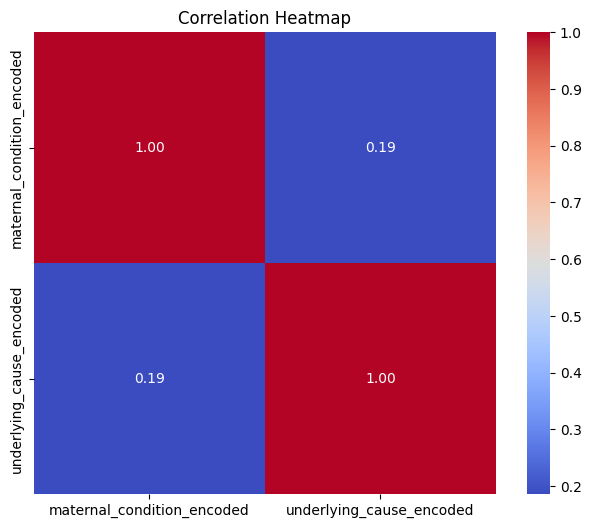

In [401]:
# Define the top three categories
top_three_categories = ['Intrauterine hypoxia', 'Birth asphyxia', 'Undetermined']
# Filter the DataFrame
filtered_df = df_champs[df_champs['underlying_cause'].isin(top_three_categories)][['maternal_condition', 'underlying_cause']]
# Initialize the LabelEncoder
le = LabelEncoder()
# Apply LabelEncoder to maternal_condition
filtered_df['maternal_condition_encoded'] = le.fit_transform(filtered_df['maternal_condition'])
# Apply LabelEncoder to underlying_cause
filtered_df['underlying_cause_encoded'] = le.fit_transform(filtered_df['underlying_cause'])
# Calculate the correlation matrix
correlation_matrix = filtered_df[['maternal_condition_encoded', 'underlying_cause_encoded']].corr()
# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", cbar=True, square=True)
plt.title('Correlation Heatmap')
plt.show()

##### **4. Feature Engineering**

In [402]:
# Suppress specific warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.ensemble._weight_boosting")
class ToDenseTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return np.asarray(X.todense())
# Define feature and target variables
X = df_champs[['underlying_cause', 'maternal_condition']]
y = df_champs['case_type']
# Encode target variable
le_case_type = LabelEncoder()
y_encoded = le_case_type.fit_transform(y)
encoder = ColumnTransformer(# Encode feature variables
    transformers=[
        ('cat', OneHotEncoder(), ['underlying_cause', 'maternal_condition'])
    ])
# Define preprocessing for encoded features
preprocessor = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('to_dense', ToDenseTransformer()),
    ('scaler', RobustScaler())
])
# Combine encoding and preprocessing steps
full_pipeline = Pipeline(steps=[
    ('encoder', encoder),
    ('preprocessor', preprocessor)
])

# Transform the features
X_encoded = full_pipeline.fit_transform(X)

# Define and train classification models
models = {
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(probability=True),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'GradientBoostingClassifier': GradientBoostingClassifier(),
    'XGBClassifier': XGBClassifier()
}
# Train and evaluate models
best_model_name = None
best_model_score = 0
for model_name, model in models.items():
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X_encoded, y_encoded, cv=kf, scoring='accuracy')
    mean_score = scores.mean()
    print(f'{model_name} - Accuracy: {mean_score:.4f}')
    
    if mean_score > best_model_score:
        best_model_score = mean_score
        best_model_name = model_name


LogisticRegression - Accuracy: 0.6869
SVC - Accuracy: 0.6778
AdaBoostClassifier - Accuracy: 0.5744
RandomForestClassifier - Accuracy: 0.6869
GradientBoostingClassifier - Accuracy: 0.6846
XGBClassifier - Accuracy: 0.6645


##### **5. Model Evaluation**

Accuracy of the best model (RandomForestClassifier): 0.8761


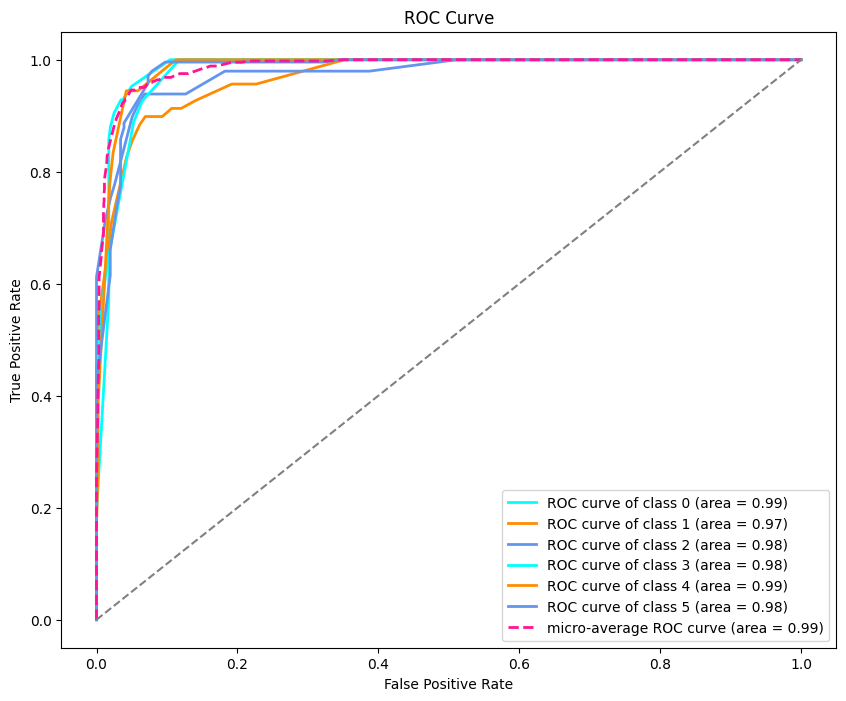

In [403]:
# Select the best model
best_model = models[best_model_name]
best_model.fit(X_encoded, y_encoded)

# Predict on the same dataset (for evaluation purposes)
y_pred = best_model.predict(X_encoded)

# Accuracy score
accuracy = accuracy_score(y_encoded, y_pred)
print(f'Accuracy of the best model ({best_model_name}): {accuracy:.4f}')

# Binarize the output for multiclass ROC AUC
y_bin = label_binarize(y_encoded, classes=np.unique(y_encoded))

# Compute ROC curve and ROC area for each class
n_classes = y_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    y_prob = best_model.predict_proba(X_encoded)[:, i]
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_bin.ravel(), best_model.predict_proba(X_encoded).ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Plot ROC curve
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')
plt.plot(fpr["micro"], tpr["micro"], color='deeppink', linestyle='--', linewidth=2,
         label='micro-average ROC curve (area = {0:0.2f})'.format(roc_auc["micro"]))

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#### **6. Result Visualization**


In [404]:
# A. Plot feature importance for best model
if best_model_name == model_name:
    # Since we use OneHotEncoder, get feature names
    feature_names = full_pipeline.named_steps['encoder'].named_transformers_['cat'].get_feature_names_out(
        ['underlying_cause', 'maternal_condition'])
    feature_importances = pd.Series(best_model.feature_importances_, index=feature_names)
    feature_importances.sort_values(ascending=False).plot(kind='barh', title='Feature Importance')
    plt.xlabel('Importance Score')
    plt.ylabel('Features')
    plt.show()
else:
    print(f"Feature importance is not available for the model {best_model_name}")

Feature importance is not available for the model RandomForestClassifier


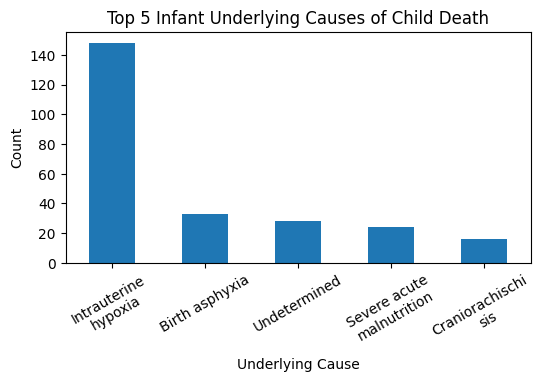

In [416]:
# B. Plot the top five infant underlying causes of the child death
top_infant_causes = df_champs['underlying_cause'].value_counts().head(5)
plt.figure(figsize=(6, 3))
top_infant_causes.plot(kind='bar', title='Top 5 Infant Underlying Causes of Child Death')
plt.xlabel('Underlying Cause')
plt.ylabel('Count')
plt.xticks(rotation=30)
# Wrap xtick labels
wrapped_labels = [textwrap.fill(label, width=15) for label in top_infant_causes.index]
plt.xticks(range(len(wrapped_labels)), wrapped_labels)
plt.show()

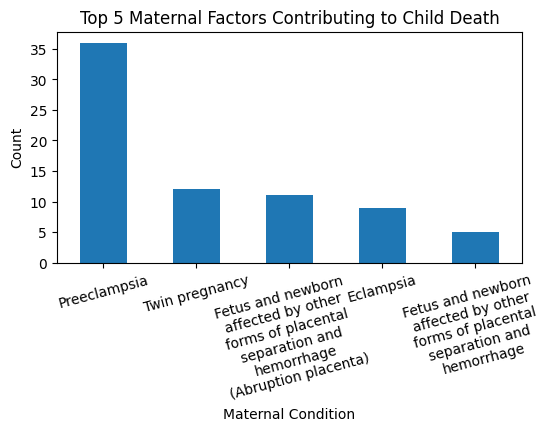

In [409]:
# C. Plot the top five maternal factors contributing to the child death
top_maternal_factors = df_champs['maternal_condition'].value_counts().head(5)
plt.figure(figsize=(6, 3))
top_maternal_factors.plot(kind='bar', title='Top 5 Maternal Factors Contributing to Child Death')
plt.xlabel('Maternal Condition')
plt.ylabel('Count')
plt.xticks(rotation=15)
# Wrap xtick labels
wrapped_labels = [textwrap.fill(label, width=20) for label in top_maternal_factors.index]
plt.xticks(range(len(wrapped_labels)), wrapped_labels)
plt.show()

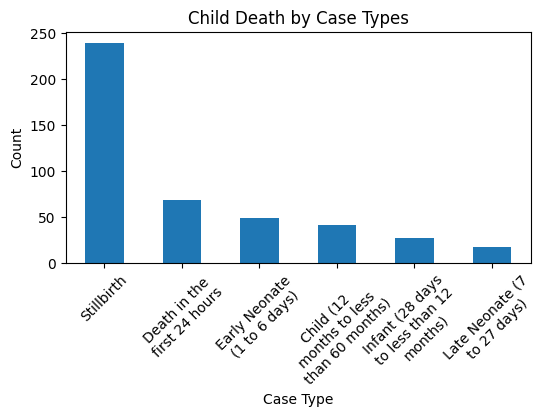

In [414]:
# D. Plot the child death based on the case types
case_type_counts = df_champs['case_type'].value_counts()
plt.figure(figsize=(6, 3))
case_type_counts.plot(kind='bar', title='Child Death by Case Types')
plt.xlabel('Case Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
# Wrap xtick labels
wrapped_labels = [textwrap.fill(label, width=15) for label in case_type_counts.index]
plt.xticks(range(len(wrapped_labels)), wrapped_labels)
plt.show()